In [0]:
import numpy as np
import datetime as dt
import gzip
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pickle

In [0]:
!wget 'https://github.com/bw-airbnb-team-3/data-engineering/blob/master/train_encoded_cleaned.csv.gz?raw=true' -O train_encoded_cleaned.csv.gz

--2020-01-10 15:27:17--  https://github.com/bw-airbnb-team-3/data-engineering/blob/master/train_encoded_cleaned.csv.gz?raw=true
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bw-airbnb-team-3/data-engineering/raw/master/train_encoded_cleaned.csv.gz [following]
--2020-01-10 15:27:17--  https://github.com/bw-airbnb-team-3/data-engineering/raw/master/train_encoded_cleaned.csv.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bw-airbnb-team-3/data-engineering/master/train_encoded_cleaned.csv.gz [following]
--2020-01-10 15:27:17--  https://raw.githubusercontent.com/bw-airbnb-team-3/data-engineering/master/train_encoded_cleaned.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133

In [0]:
train = pd.read_csv('/content/train_encoded_cleaned.csv.gz', compression= 'gzip', index_col=0, error_bad_lines=False, warn_bad_lines=False)

print(train.shape)
train.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(14647096, 41)


,zipcode,availability_30,is_location_exact,review_scores_accuracy,host_has_profile_pic,bed_type,host_identity_verified,review_scores_value,review_scores_communication,accommodates,host_response_rate,host_is_superhost,cancellation_policy,bathrooms,host_response_time,neighbourhood_group_cleansed,require_guest_phone_verification,review_scores_cleanliness,review_scores_rating,property_type,requires_license,guests_included,availability_90,review_scores_checkin,review_scores_location,maximum_minimum_nights,require_guest_profile_picture,beds,room_type,instant_bookable,minimum_nights,extra_people,minimum_minimum_nights,availability_60,bedrooms,price,year,month,day,latitude,longitude
0,90230.0,0,1,10.0,1,4,1,8.0,8.0,6,2,0,6,2.0,3,1,0,10.0,80.0,15,0,3,0,6.0,10.0,30,1,3,0,0,30,37,30,0,2.0,115.0,2019,12,6,33.98209,-118.38494
1,90230.0,0,1,10.0,1,4,1,8.0,8.0,6,2,0,6,2.0,3,1,0,10.0,80.0,15,0,3,0,6.0,10.0,30,1,3,0,0,30,37,30,0,2.0,115.0,2019,12,7,33.98209,-118.38494
2,90230.0,0,1,10.0,1,4,1,8.0,8.0,6,2,0,6,2.0,3,1,0,10.0,80.0,15,0,3,0,6.0,10.0,30,1,3,0,0,30,37,30,0,2.0,115.0,2019,12,8,33.98209,-118.38494
3,90230.0,0,1,10.0,1,4,1,8.0,8.0,6,2,0,6,2.0,3,1,0,10.0,80.0,15,0,3,0,6.0,10.0,30,1,3,0,0,30,37,30,0,2.0,115.0,2019,12,9,33.98209,-118.38494
4,90230.0,0,1,10.0,1,4,1,8.0,8.0,6,2,0,6,2.0,3,1,0,10.0,80.0,15,0,3,0,6.0,10.0,30,1,3,0,0,30,37,30,0,2.0,115.0,2019,12,10,33.98209,-118.38494


In [0]:
X_train = train.drop(columns= 'price')
y_train = train['price']

X_train.shape, y_train.shape

((14647096, 40), (14647096,))

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.80, 
                                                  test_size = 0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size = 0.80, 
                                                  test_size = 0.20, random_state=42)

((9374140, 40),
 (9374140,),
 (2929420, 40),
 (2929420,),
           zipcode  availability_30  is_location_exact  ...  day  latitude  longitude
 8640873   90046.0                7                  1  ...    8  34.09364 -118.35064
 6536194   90034.0                0                  0  ...   26  34.01730 -118.41359
 13622513  90802.0               29                  1  ...   23  33.76729 -118.18743
 8571888   90505.0                0                  1  ...   19  33.80074 -118.34348
 1630511   90066.0                0                  1  ...   27  33.99564 -118.43946
 ...           ...              ...                ...  ...  ...       ...        ...
 12783     90068.0                4                  0  ...   10  34.11939 -118.32044
 6712775   90068.0                0                  0  ...    4  34.10911 -118.32623
 4486920   90247.0                0                  1  ...   29  34.66875 -118.15798
 3939521   90247.0               18                  1  ...    6  34.04282 -118.25

In [0]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((9374140, 40),
 (9374140,),
 (2929420, 40),
 (2929420,),
 (2343536, 40),
 (2343536,))

In [0]:
eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model = XGBRegressor(n_estimators=250, n_jobs=-1)
model.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse', 
          early_stopping_rounds=50)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:57:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:42] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-rmse:619.145	validation_1-rmse:625.475
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:592.743	validation_1-rmse:599.078
[2]	validation_0-rmse:569.708	validation_1-rmse:575.561
[3]	validation_0-rmse:550.759	validation_1-rmse:556.066
[4]	validation_0-rmse:532.241	validation_1-rmse:537.159
[5]	validation_0-rmse:516.491	validation_1-rmse:520.963
[6]	validation_0-rmse:502.952	validation_1-rmse:507.129
[7]	validation_0-rmse:490.332	validation_1-rmse:494.218
[8]	validation_0-rmse:479.014	validation_1-rmse:482.

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

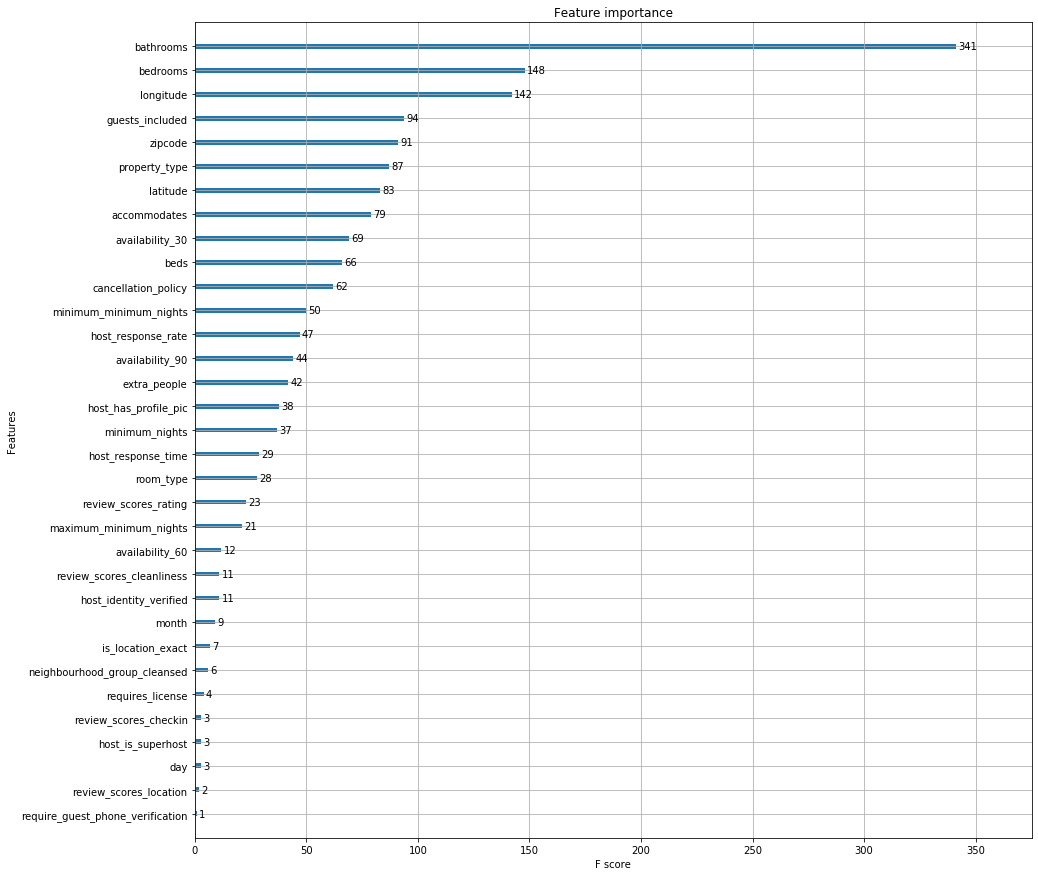

In [0]:
plt.rcParams["figure.figsize"] = (15,15)
xgb.plot_importance(model)

In [0]:
predictions = model.predict(X_test)
predictions

NameError: ignored

In [0]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse

316.17524316152435

In [0]:
pickle.dump(model, open("xgbregressor_airbnb_large.pickle.dat", "wb"))

In [0]:
model = pickle.load(open("xgbregressor_airbnb_large.pickle.dat", "rb"))

[23:53:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
test_results = pd.DataFrame(data={'True':y_test, 'Predicted':predictions}, columns= ['True','Predicted'] )
test_results.head()

,True,Predicted
8640873,198.0,215.669327
6536194,55.0,94.267174
13622513,159.0,209.943832
8571888,75.0,93.309044
1630511,101.0,74.202400


In [0]:
xgbregressor_matrix = xgb.DMatrix(X_train, y_train)

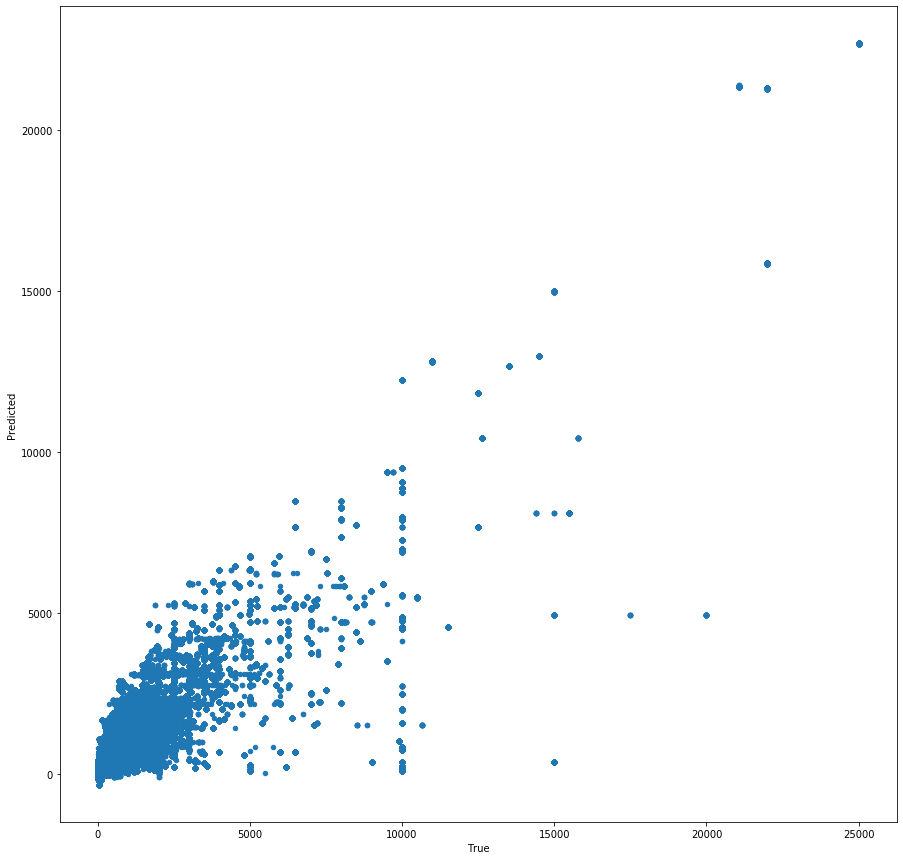

In [0]:
test_results.plot.scatter(x = 'True', y = 'Predicted')